# NCAR EdEc Bootcamp, Lesson 3

Supervised Learning using linear methods and KNN's.

## Python Imports

In [30]:
import pandas as pd
import numpy as np

# Dataset
from palmerpenguins import load_penguins

# Plotting
import matplotlib.pyplot as plt

# Machine Learning
import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
print('scikit-learn version:', sklearn.__version__)

scikit-learn version: 1.3.0


## Dataset Loading

This will be replaced with a charlie dataset :) 

In [11]:
df = load_penguins()
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [12]:
df = df.drop(['year'], axis=1)
df = df.dropna() # this drops all rows with a nan in it
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


## Let's scale the dataset:

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
float_columns = df.select_dtypes(include=['float64', 'float32'])
float_column_names = float_columns.columns.tolist()
float_column_names

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

std_scaled = scaler.fit_transform(float_columns, y=None)
np.shape(std_scaled)

(333, 4)

Everything above this is the ~same as notebook 2

## Supervised ML

We will cover two of these below, but scikit-learn can do all of these, with a nice overview [here](https://scikit-learn.org/stable/supervised_learning.html).

## Splitting Data

Note: For this exercise, we will just have a testing and a training dataset, not a validation dataset. For the final runthrough on day 2, we will have a validation dataset. All input features will be floats. 

In [16]:
from sklearn.model_selection import train_test_split

#### Regression split

Let's predict body mass from bill size and flipper size

In [17]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(std_scaled[:,0:3], std_scaled[:,3], test_size=0.33, random_state=42)

#### Classification split

We will predict specie from all measurements

In [18]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(std_scaled, df.species, test_size=0.33, random_state=42)

# Non-Linear Models

## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is advantageous in supervised machine learning due to its simplicity and versatility. KNN's ability to adapt to different data distributions and handle multi-class problems makes it suitable for various scenarios. Its non-parametric nature eliminates the need for assumptions about data distribution, allowing it to capture complex decision boundaries. KNN's effectiveness, especially when combined with appropriate distance metrics and optimization techniques, makes it a valuable tool for supervised ML tasks. Some even call it a 'lazy learner' compared to more normal machine learning. 

Great video [here](https://www.youtube.com/watch?v=HVXime0nQeI) by StatQuest

## Classification

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Create a KNeighborsClassifier model
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model.fit(X_train_clf, y_train_clf)

# Make predictions on the test data
y_pred_knn_clf = model.predict(X_test_clf)

# Calculate the accuracy and confusion matrix to evaluate the model's performance
accuracy = accuracy_score(y_test_clf, y_pred_knn_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_knn_clf)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Print the learned classes for each label
print("Learned Classes:", model.classes_)

Accuracy: 0.98
Confusion Matrix:
[[52  0  0]
 [ 2 23  0]
 [ 0  0 33]]
Learned Classes: ['Adelie' 'Chinstrap' 'Gentoo']


## Regression

In [ ]:
# write your KNN regression code here!

# Next steps

In [28]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train_clf, y_train_clf)

# Make predictions on the test data
y_pred = clf.predict(X_test_clf)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test_clf, y_pred)
print("Accuracy:", np.round(accuracy,3))

Accuracy: 0.964


In [34]:
y_train_clf.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

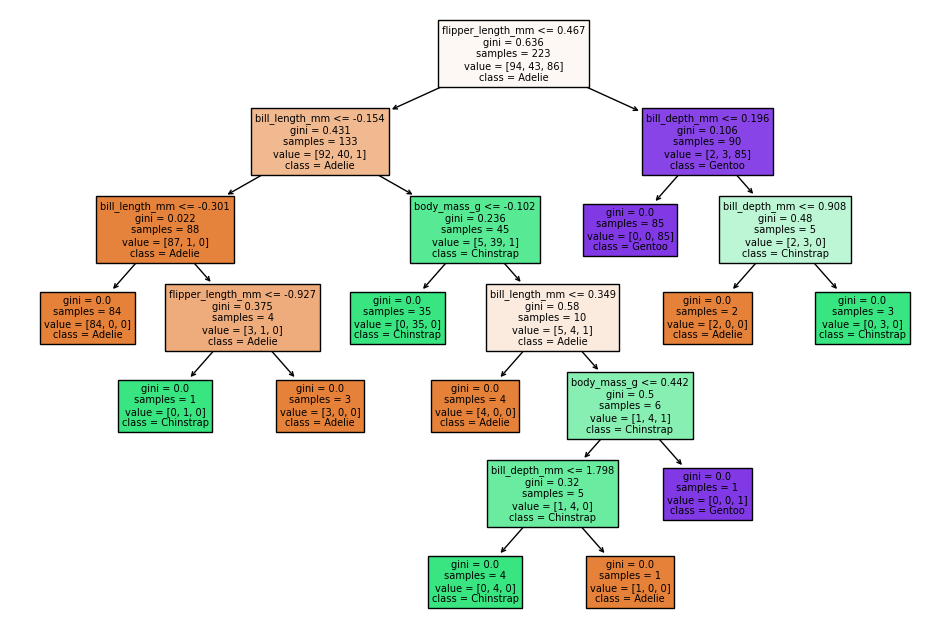

In [36]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=float_column_names, class_names=list(y_train_clf.unique()))
plt.show()

Tomorrow we will get to tree based methods!

the end